# Анализ рынка видеоигр

**ОПИСАНИЕ ПРОЕКТА**

Предмет исследования - деятельность интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.\
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы\
(например, Xbox или PlayStation).\
Предоставлены данные до 2016 года.

**ЗАДАЧА ИССЛЕДОВАНИЯ**

Нужно выявить определяющие успешность игры закономерности.\
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Нужно отработать принцип работы с данными.

**ПЛАН ИССЛЕДОВАНИЯ**

1. [Изучение общей информации](#read)
2. [Предобработка данных](#process)
3. [Исследовательский анализ данных](#research)
4. [Составление портрета пользователя каждого региона](#portrait)
5. [Общий вывод по проекту](#conclusion)

<a id='read'></a>
## Изучение общей информации

### Загрузим данные из файла в датафрейм

In [1]:
!pip install jupyter_black -q

In [2]:
!pip install missingno -q

Импортируем необходимые библиотеки

In [3]:
# импорт pandas и необходимых библиотек
import jupyter_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import os
import seaborn as sns
import warnings

from scipy import stats


warnings.filterwarnings("ignore")

jupyter_black.load()

Откроем файл, прочтем и запишем в переменную.

In [4]:
# объявление переменных
games = "dataset.csv"
user_path = "..."
general_path = "..."


# функция для чтения файлов
def get_read_file(general_path, user_path, file, delimiter):
    path1 = os.path.join(general_path, file)
    path2 = os.path.join(user_path, file)

    try:
        if os.path.exists(os.path.join(path1)):
            return pd.read_csv(
                path1,
                sep=delimiter,
            )
        elif os.path.exists(os.path.join(path2)):
            return pd.read_csv(
                path2,
                sep=delimiter,
            )
    except Exception as err:
        print("Путь к файлу не найден!", err)


# чтение csv-файла в датафрейм с сохранением в переменную games_df
games_df = get_read_file(general_path, user_path, games, ",")

# сохранение количества строк в переменную
rows_before = games_df.shape[0]

### Изучим общую информацию о полученном датафрейме

In [5]:
# вывод первых 10-ти строчек датафрейма
games_df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# вывод основной информации о датафрейме
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обратим внимание на названия столбцов

In [7]:
# вывод названий столбцов
print(*games_df.columns)

Name Platform Year_of_Release Genre NA_sales EU_sales JP_sales Other_sales Critic_Score User_Score Rating


Обратим внимание на типы данных в таблице

In [8]:
# вывод информации о типах данных в датафрейме
games_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Выведем количество явных дубликатов

In [9]:
# вывод количества явных дубликатов датафрейма
print(games_df.duplicated().sum())

0


***

**Вывод:**

В результате изучения общей информации о датафрейме обнаружено:

1. Некорректное наименование столбцов:
   - во всех столбцах - сочетание прописных и строчных букв, стиль написания, отличный от "lower_case_with_underscores"
2. Большое количество пропущенных значений в 3-х столбцах:
   - `'Critic_Score'`
   - `'User_Score'`
   - `'Rating'`
3. Также пропущены значения в 3-х столбцах:
   - `'Name'`
   - `'Year_of_Release'`
   - `'Genre'`
4. Неправильный тип данных в 2-х столбцах:
   - `'Year_of_Release'`
   - `'User_Score'`
5. Явные дубликаты в датафрейме отсутствуют.

### Изучим общую информацию о полученном датафрейме

In [10]:
# вывод первых 10-ти строчек датафрейма
games_df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [11]:
# вывод основной информации о датафрейме
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обратим внимание на названия столбцов

In [12]:
# вывод названий столбцов
print(*games_df.columns)

Name Platform Year_of_Release Genre NA_sales EU_sales JP_sales Other_sales Critic_Score User_Score Rating


Обратим внимание на типы данных в таблице

In [13]:
# вывод информации о типах данных в датафрейме
games_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Выведем количество явных дубликатов

In [14]:
# вывод количества явных дубликатов датафрейма
games_df.duplicated().sum()

np.int64(0)

---
<hr>

**Вывод:**

В результате изучения общей информации о датафрейме обнаружено:

1. Некорректное наименование столбцов:
   - во всех столбцах - сочетание прописных и строчных букв, стиль написания, отличный от "lower_case_with_underscores"
2. Большое количество пропущенных значений в 3-х столбцах:
   - `'Critic_Score'`
   - `'User_Score'`
   - `'Rating'`
3. Также пропущены значения в 3-х столбцах:
   - `'Name'`
   - `'Year_of_Release'`
   - `'Genre'`
4. Неправильный тип данных в 2-х столбцах:
   - `'Year_of_Release'`
   - `'User_Score'`
5. Явные дубликаты в датафрейме отсутствуют.

<a id='process'></a>
## Предобработка данных

### Переименование столбцов

Переименуем столбцы датафрейма и выведем их

In [15]:
# переименование столбцов датафрейма
games_df.columns = games_df.columns.str.lower()
print(*games_df.columns, sep="\n")

name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


***

**Вывод:**

Все столбцы были приведены к стилю "lower_case_with_underscores"

### Обработка неявных дубликатов

Проведем поиск неявных дубликатов по значимым столбцам датафрейма:
- `'name'`
- `'platform'`
- `'year_of_release'`

In [16]:
# вывод количества неявных дубликатов по совпадению в значимых колонках
print(games_df[["name", "platform", "year_of_release"]].duplicated().sum())

2


In [17]:
# вывод дублирующихся строк датафрейма
games_df[games_df[["name", "platform", "year_of_release"]].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Удалим найденные неявные дубликаты и проверим удаление

In [18]:
# удаление дубликатов
games_df = games_df.drop_duplicates(
    ["name", "platform", "year_of_release"]
).reset_index(drop=True)
# вывод общей информации о датафрейме для проверки удаления
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***

**Вывод:**

Были найдены неявные дубликаты. Удалено 2 строки.

### Обработка пропущенных значений

#### Изучение пропусков

Выведем количество пропущенных значений для каждого столбца датафрейма

In [19]:
# вывод количества пропущенных значений для каждого столбца
games_df.isna().sum().sort_values(ascending=False)

critic_score       8577
rating             6765
user_score         6700
year_of_release     269
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Посчитаем процент пропусков для всех столбцов датафрейма

In [20]:
# вывод доли пропущенных значений для каждого столбца
games_df.isna().mean().sort_values(ascending=False).round(4) * 100

critic_score       51.32
rating             40.48
user_score         40.09
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64

***

**Вывод:**

1. Доля пропущенных значений в столбцах очень мала - строки с пропусками можно удалить:
   - `'year_of_release'` - 1.61 %
   - `'name'`            - 0.01 %
   - `'genre'`           - 0.01%


2. Доля пропущенных значений в столбцах велика - строки с пропусками нужно обработать:
   - `'critic_score'` - 51,32 %
   - `'rating'`       - 40.48 %
   - `'user_score'`   - 40.09 %

#### Удаление пропусков

Удалим пропущенные значения в столбцах: `'year_of_release'`, `'name'`, `'genre'`\
и проверим удаление

In [21]:
# удаление пропущенных значений в столбцах
for column in ["year_of_release", "name", "genre"]:
    games_df = games_df.dropna(subset=[column]).reset_index(drop=True)
# вывод общей информации о датафрейме для проверки удаления
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***

**Вывод:**

Удалено 270 строк с пропусками в столбцах:
- `'year_of_release'`
- `'name'`
- `'genre'`

#### Заполнение пропусков

Изучим оставшиеся пропуски

In [22]:
# объявление списка столбцов с пропусками
columns_lst = ["critic_score", "user_score", "rating"]
# вывод пропусков по списку
games_df[columns_lst].isna().sum().sort_values(ascending=False)

critic_score    8461
rating          6676
user_score      6605
dtype: int64

Изучим возможные взаимосвязи в пропущенных значениях

<Axes: >

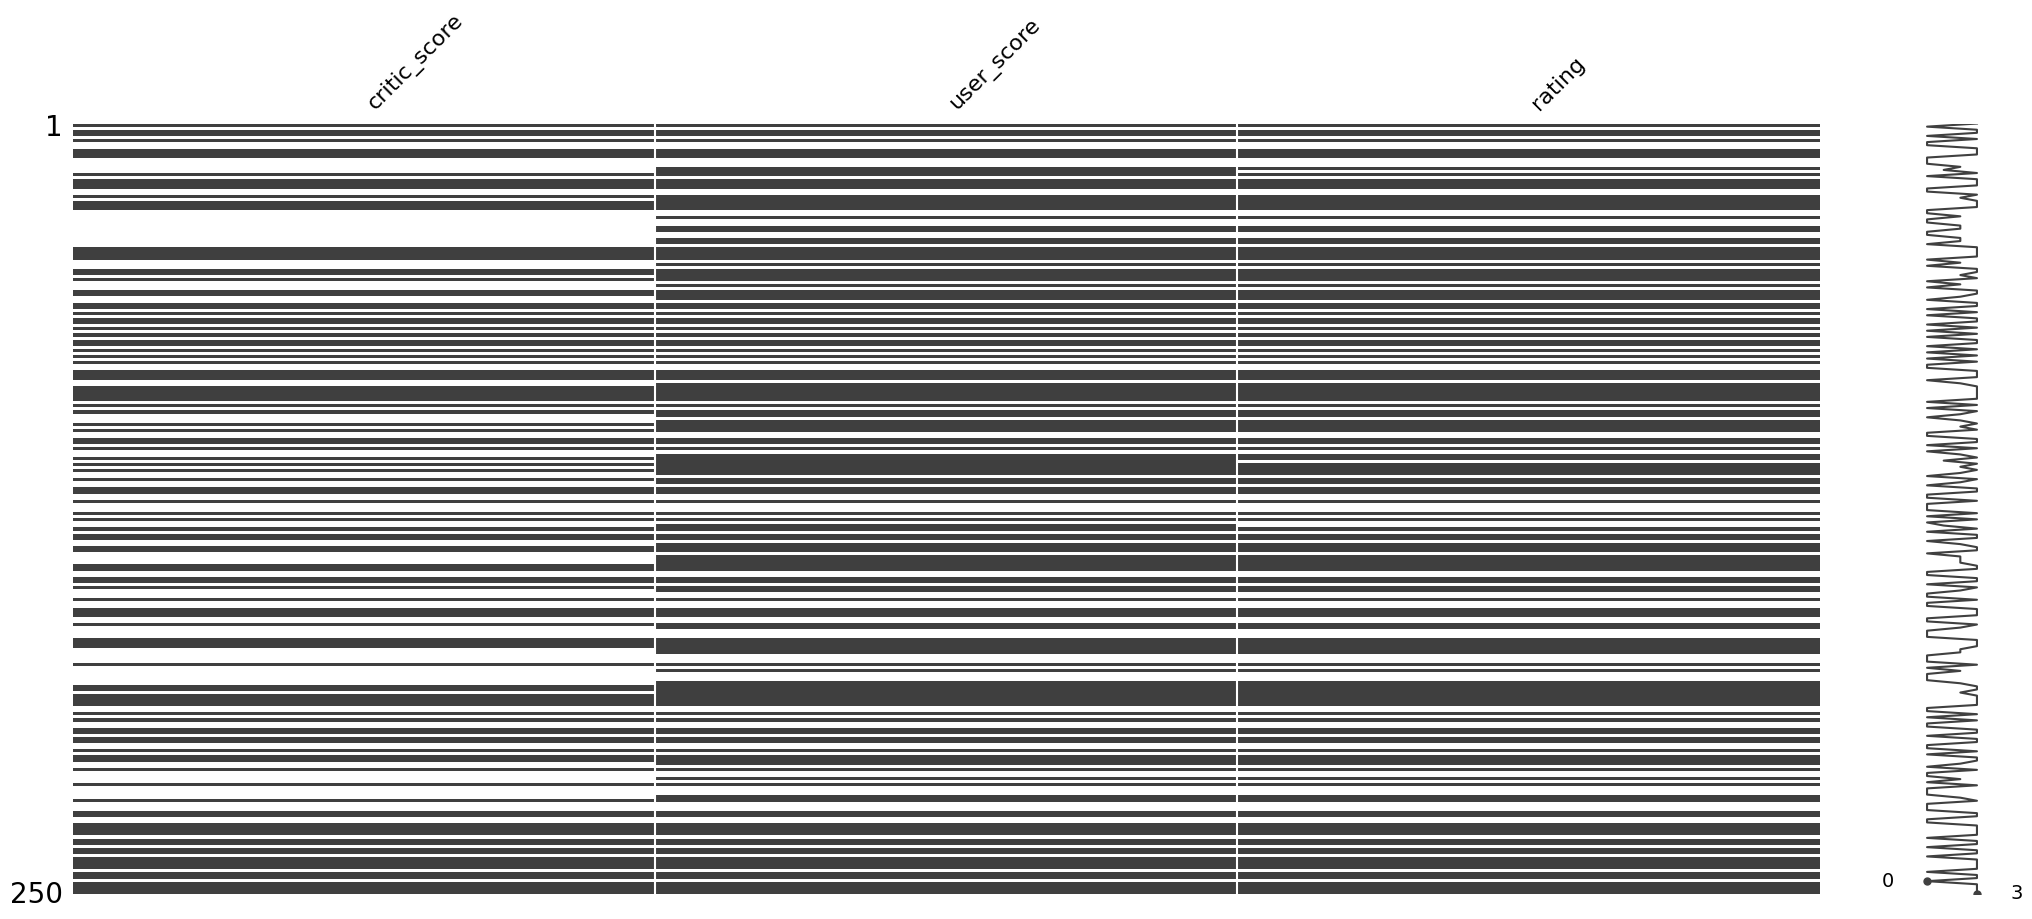

In [23]:
# визуализация пропусков на случайной выборке
msno.matrix(games_df[["critic_score", "user_score", "rating"]].sample(250))

Визуализация показывает наличие взаимосвязи среди пропущенных значений

Изучим корреляцию столбцов с пропусками на тепловой карте

<Axes: >

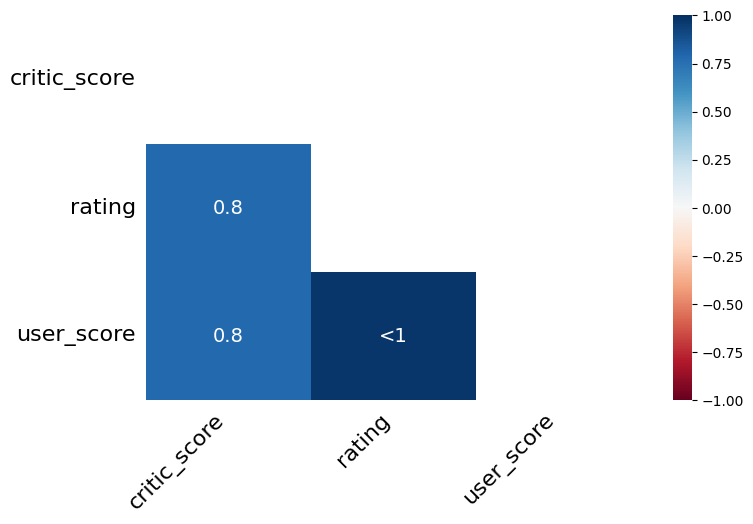

In [24]:
# рассчитаем корреляцию
msno.heatmap(games_df[["critic_score", "rating", "user_score"]], figsize=(8, 5))

Корреляция пропусков между переменными в столбцах `'rating'` и `'critic_score'`,\
а также в столбцах `'user_score'` и `'critic_score'` - высокая, и составляет 0,8.\
А между переменными `'rating'` и `'user_score'` стремится к значению 1.

Подтвердим выводы математически

In [25]:
# вывод количества строк с пропусками во всех столбцах
games_df[columns_lst][
    (games_df["critic_score"].isna())
    & (games_df["rating"].isna())
    & (games_df["user_score"].isna())
].isna().sum()

critic_score    6534
user_score      6534
rating          6534
dtype: int64

Действительно, большая часть пропусков приходится на одни и те же строки.

Пропуски в значениях могли возникнуть при сборе информации из разных источников\
и некорректной сборке в одну таблицу.

Пропуски в данных `'critic_score'` и `'user_score'` заполнять средним значением или медианой нецелесообразно.

Так как рейтинг - это категориальная переменная со строковым типом данных, заполним его значением "*unknown*"

In [26]:
# заполнение пропуска значением
games_df.loc[games_df["rating"].isna(), "rating"] = "unknown"

***

**Вывод:**

В результате предобработки пропущенных значений:

1. Была обнаружена взаимосвязь пропусков в столбцах
   - `'critic_score'`
   - `'user_score'`
   - `'rating'`
2. Одна из вероятных причин появления пропусков в столбцах:
   - `'critic_score'`
   - `'user_score'`
   - `'rating'`\
   это ошибка при сборке информации в таблицу.
3. Пропуски не были заполнены в столбцах
   - `'critic_score'`
   - `'user_score'`
4. Пропуски были заполнены значением "*unrnown*" в столбце
   - `'rating'`

### Обработка значения "*tbd*" в столбце `'user_score'`

Доля значения "*tbd*" в столбце `'user_score'` составляет:

In [27]:
# вычисление и вывод доли по условию
print(
    f"{round(games_df[games_df['user_score'] == 'tbd']['user_score'].count()/len(games_df['name'])*100, 2)} %"
)

14.45 %


Оценка "*tbd*" в столбце `'user_score'` - это сокращение от "to be defined",\
то есть игра еще не оценена достаточным количеством пользователей, и рейтинг не известен.

Так как столбец должен иметь числовой тип данных ***float***,\
преобразуем "*tbd*" в значение -1.

In [28]:
# переименование значений столбца по условию
games_df.loc[games_df["user_score"] == "tbd", "user_score"] = -1

***

**Вывод:**

Значение "*tbd*" было преобразовано в значение -1 в столбце `'user_score'`

### Преобразование типа данных

В столбце `'year_of_release'` тип данных требуется заменить на целочисленный,\
так как год релиза может быть только целым числом.

Так как данные в столбце `'critic_score'` представлены числами без значимой дробной части,\
тип данных в этом столбце также можно заменить на целочисленный.

In [29]:
# преобразование типа данных в целочисленный
games_df["critic_score"] = games_df["critic_score"].astype("Int64")
games_df["year_of_release"] = games_df["year_of_release"].astype(int)

Так как данные в столбце `'user_score'` представлены числами со значимой дробной частью,\
тип данных в этом столбце нужно заменить на числовой тип ***float***.

При преобразовании типа данных, данные, не соответствующие числовому типу,\
сохраним в датафрейме.

In [30]:
# преобразование типа данных в числовой тип float
games_df["user_score"] = games_df["user_score"].astype(float)

Проверим преобразования

In [31]:
# вывод типов данных датафрейма
games_df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

***

**Вывод:**

Были преобразованы типы данных:

1. На целочисленный в столбцах
   - `'year_of_release'`
   - `'critic_score'`
2. На числовой тип ***float*** в столбце
   - `'user_score'`

### Подсчет суммарных продаж

Создадим новый столбец для суммарных продаж и посчитаем их.

In [32]:
# создание нового столбца подсчетом суммы
games_df["total_sales"] = (
    games_df["na_sales"]
    + games_df["eu_sales"]
    + games_df["jp_sales"]
    + games_df["other_sales"]
)
# проверка создания столбца
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


***

**Вывод:**

Был создан новый столбец `'total_sales'` с суммарными продажами по всем регионам.

### Вывод по предобработке данных

Выведем количественные результаты предобработки

In [33]:
print(f"Датафрейм для анализа данных содержит {games_df.shape[0]} строк.")
print(f"Первоначальный датафрейм содержал {rows_before} строк.")
print(f"Удалено {rows_before-games_df.shape[0]} строки.")
print(
    f"Это примерно {round(100-(games_df.shape[0]/rows_before*100), 2)}% от первоначального размера датафрейма."
)

Датафрейм для анализа данных содержит 16443 строк.
Первоначальный датафрейм содержал 16715 строк.
Удалено 272 строки.
Это примерно 1.63% от первоначального размера датафрейма.


**Вывод:**

1. Названия всех столбцов были приведены к стилю "lower_case_with_underscores"
2. Были найдены неявные дубликаты. Удалено 2 строки.
3. Удалено 270 строк с пропусками в столбцах:
   - `'year_of_release'`
   - `'name'`
   - `'genre'`
4. Была обнаружена взаимосвязь пропусков в столбцах
   - `'critic_score'`
   - `'user_score'`
   - `'rating'`
5. Одна из вероятных причин появления пропусков в столбцах:
   - `'critic_score'`
   - `'user_score'`
   - `'rating'`\
   это ошибка при сборке информации в таблицу.
6. Пропуски не были заполнены в столбцах
   - `'critic_score'`
   - `'user_score'`
7. Пропуски были заполнены значением "*unrnown*" в столбце
   - `'rating'`
8. Значение "*tbd*" было преобразовано в значение -1 в столбце `'user_score'`
9. Были преобразованы типы данных:
   - На целочисленный в столбцах
     -  `'year_of_release'`
     -  `'critic_score'`
   - На числовой тип **float** в столбце
     - `'user_score'`
10. Был создан новый столбец `'total_sales'` с суммарными продажами по всем регионам.
11. Были выведены количественные результаты предобработки.

<a id='research'></a>
## Исследовательский анализ данных

### Статистика выпуска игр по годам

Посмотрим, сколько игр выпускалось в разные годы

In [34]:
# создание датафрейма срезом и группировкой
year_df = (
    games_df.query("year_of_release > -1")
    .groupby("year_of_release")["name"]
    .count()
    .reset_index()
    .rename(columns={"name": "count", "index": "year_of_release"})
)
# вывод датафрейма
year_df

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


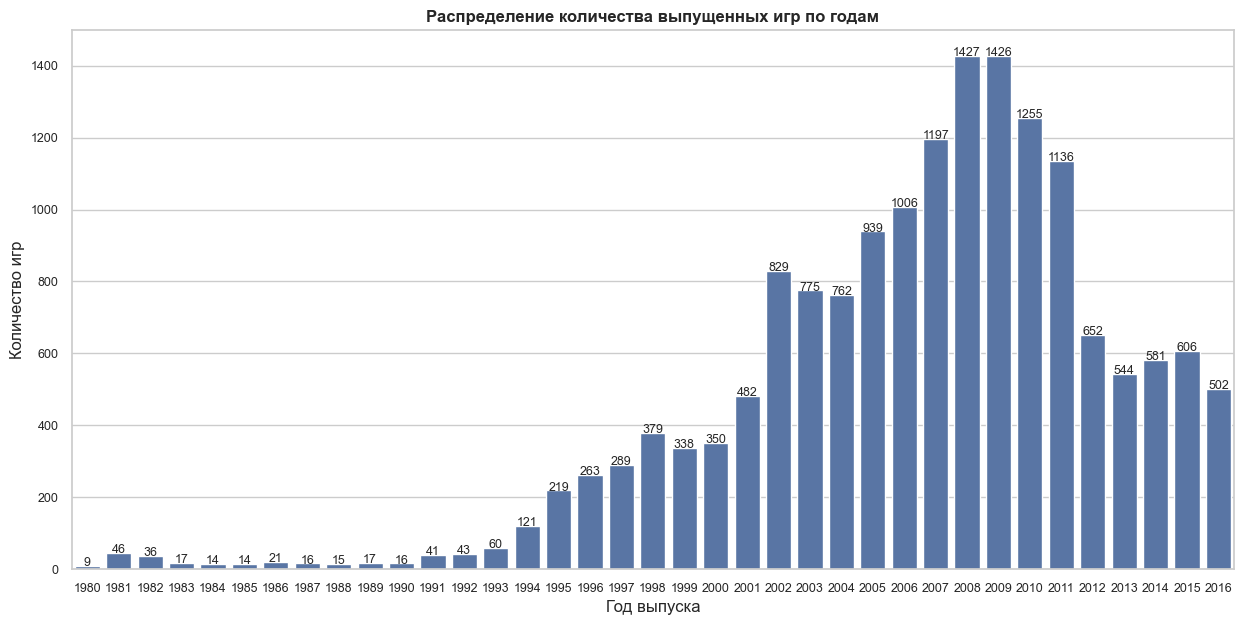

In [35]:
# Установка стиля для графиков
sns.set(style="whitegrid")
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x="year_of_release", data=games_df.query("year_of_release > -1"))
plt.title("Распределение количества выпущенных игр по годам", weight="bold")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.tick_params(labelsize=9)
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height(),
            int(rect.get_height()),
            horizontalalignment="center",
            fontsize=9,
        )
    )

На графике видно, что до начала 90-х релизов игр было в пределах 20-40.\
С начала 90-х началось увеличение числа игр на рынке.\
Пик выхода новых игр приходится на 2008-2009 г.г.\
Далее наблюдается спад, и в период с 2012 по 2016 год наблюдается стабилизация количества релизов игр.

***

**Вывод:**

1. В датафрейме представлены игры с релизом с 1980 по 2016 год.
2. Рост числа выпуска игр начинается с 1993 года, с максимумом примерно в 2008-2009 г.г.\
   Далее наблюдается спад, и в период с 2012 по 2016 год наблюдается стабилизация количества релизов игр.
3. Для исследования логично выбрать период в 3 - 4 последних года.

### Статистика продаж по платформам

Посмотрим, как менялись продажи по платформам.\
Выберем 10 платформ с наибольшими суммарными продажами.

In [36]:
# создание сводной таблицы по платформам по условию
platform_df = (
    games_df.pivot_table(index=["platform"], values="total_sales", aggfunc="sum")
    .sort_values(by="total_sales", ascending=False)
    .head(10)
    .reset_index()
)
# вывод датафрейма
platform_df

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Построим распределение по годам для 5-ти платформ с наибольшими суммарными продажами

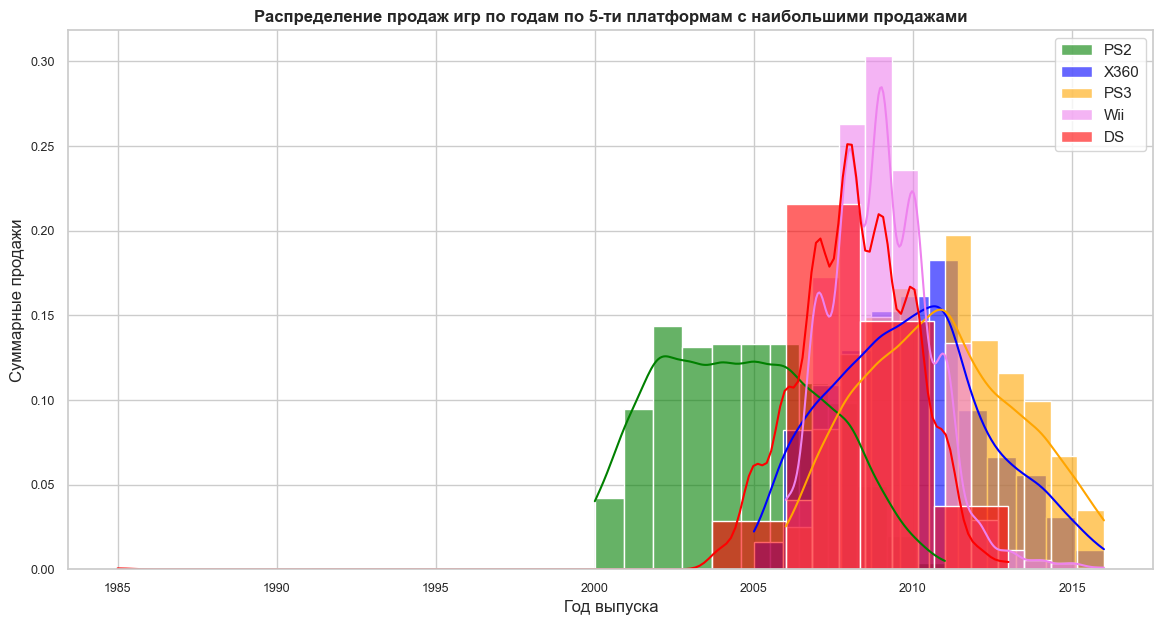

In [37]:
# Установка стиля для графика
sns.set(style="whitegrid")
# визуализация распределения по годам
plt.figure(figsize=(14, 7))
for index, row in platform_df.loc[:4].iterrows():
    pl = platform_df.loc[index, "platform"]
    colors = ["green", "blue", "orange", "violet", "red"]
    ax = sns.histplot(
        games_df.query("platform == @pl"),
        x="year_of_release",
        kde=True,
        label=pl,
        bins=12,
        stat="density",
        color=colors[index],
        alpha=0.6,
    )
plt.title(
    "Распределение продаж игр по годам по 5-ти платформам с наибольшими продажами",
    weight="bold",
)
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи")
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

На графике видно выброс примерно в 1985 году, найдем его.

In [38]:
# вывод среза данных по условию
games_df.query("year_of_release < 1990 and platform in @platform_df['platform']")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,unknown,0.02


Выведем жизненный цикл только по платформе DS

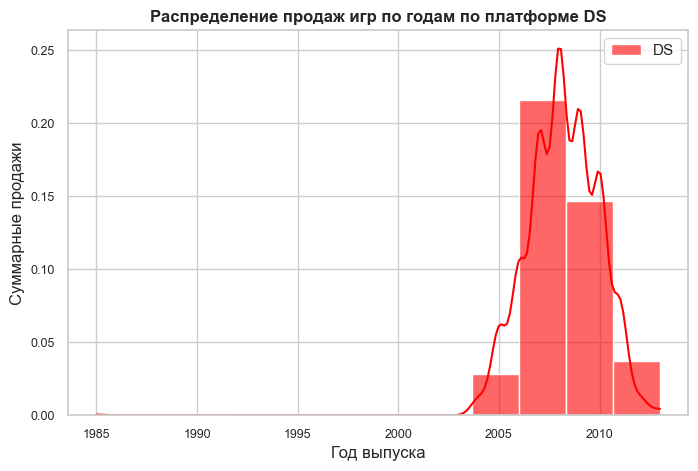

In [39]:
# Установка стиля для графика
sns.set(style="whitegrid")
# визуализация распределения по годам
plt.figure(figsize=(8, 5))
ax = sns.histplot(
    games_df.query("platform == 'DS' and not @games_df['year_of_release'].isna()"),
    x="year_of_release",
    kde=True,
    label=pl,
    bins=12,
    stat="density",
    color="red",
    alpha=0.6,
)
plt.title(
    "Распределение продаж игр по годам по платформе DS",
    weight="bold",
)
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи")
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

Продажи по платформе DS в 1985 году - это явный выброс, удалим его.

In [40]:
# удаление строки датафрейма по условию
games_df = games_df[
    ~((games_df["platform"] == "DS") & (games_df["year_of_release"] == 1985))
].reset_index(drop=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       9838 non-null   float64
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Построим распределение по годам для 5-ти платформ с наибольшими суммарными продажами после устранения выброса

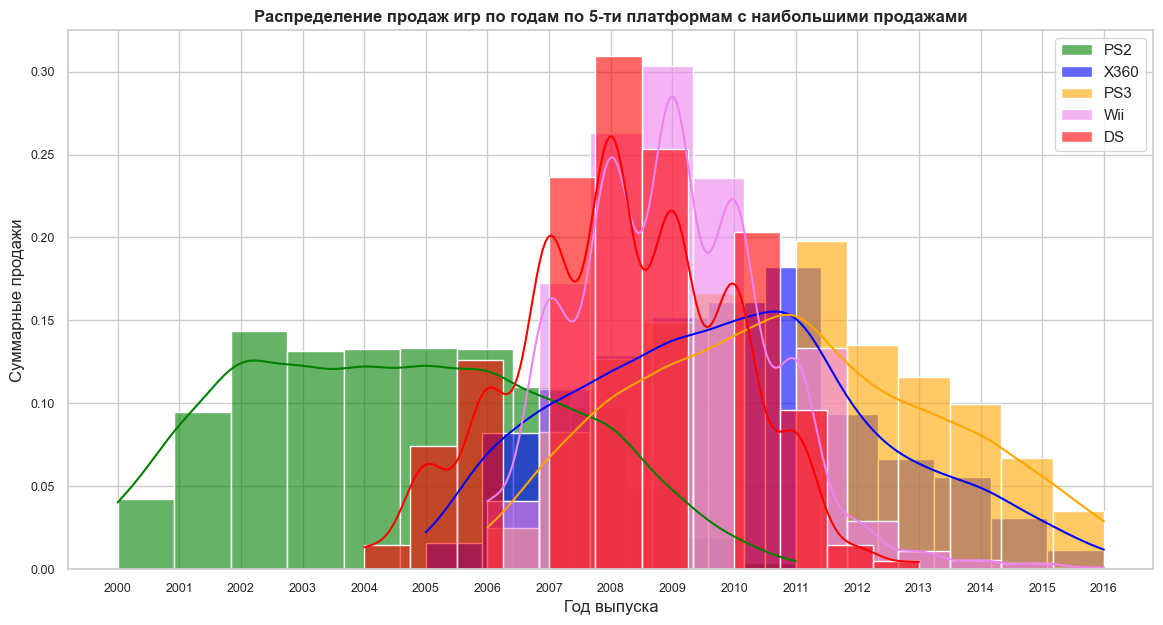

In [41]:
# Установка стиля для графика
sns.set(style="whitegrid")
# визуализация распределения по годам
plt.figure(figsize=(14, 7))
for index, row in platform_df.loc[:4].iterrows():
    pl = platform_df.loc[index, "platform"]
    colors = ["green", "blue", "orange", "violet", "red"]
    ax = sns.histplot(
        games_df.query("platform == @pl"),
        x="year_of_release",
        kde=True,
        label=pl,
        bins=12,
        stat="density",
        color=colors[index],
        alpha=0.6,
    )
plt.title(
    "Распределение продаж игр по годам по 5-ти платформам с наибольшими продажами",
    weight="bold",
)
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи")
plt.xticks(np.arange(2000, 2017, 1))
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

Как видно по графику, каждая платформа имеет свой жизненный цикл:
- сначала выход на рынок и постепенное увеличение объемов продаж - в среднем 4-6 лет
- пик объемов продаж - на 4-6 год
- постепенный спад уход с рынка - на 7-11 год

Проанализируем срок жизни платформ.\
Для этого созданим сводную таблицу по платформам\
с указанием годов выпуска игр и продолжительности жизни платформы.

In [41]:
# создание сводной таблицы
years_df = games_df.pivot_table(
    index=["platform"], values="year_of_release", aggfunc=["min", "max"]
)
# удаление мультииндекса
years_df.columns = ["_".join((j, i)) for i, j in years_df.columns]
years_df = years_df.reset_index()
# вычисление и запись в новый столбец датафрейма
years_df["life_time"] = (
    years_df["year_of_release_max"] - years_df["year_of_release_min"] + 1
)

Выведем численное описание столбца `'life_time'` новой таблицы

In [43]:
# вывод численного описания столбца датафрейма по условию
years_df["life_time"].describe().round(2)

count    31.0
mean      8.0
std       5.9
min       1.0
25%       4.0
50%       7.0
75%      11.0
max      32.0
Name: life_time, dtype: float64

Разброс данных продолжительности жизни платформ большой - от 1 года до 32 лет.\
Также наблюдается отличие величин медианы (7 лет) и среднего (8 лет).

Для дальнейшего анализа рекомендуется отсечь данные
которые больше 95% значений и меньше 5% данных.

In [44]:
# условие для отсечения данных
condition = "life_time >= @years_df['life_time'].quantile(0.05) and life_time <= @years_df['life_time'].quantile(0.95)"
# вывод численного описания столбца датафрейма по условию
years_df.query(condition)["life_time"].describe().round(2)

count    29.00
mean      6.97
std       3.78
min       1.00
25%       4.00
50%       7.00
75%      10.00
max      12.00
Name: life_time, dtype: float64

Срок жизни платформы составляет в среднем примерно 7 лет.

***

**Вывод:**

1. Были выведены платформы с наибольшими суммарными продажами за весь период наблюдений:
   PS2,	X360, PS3, Wii, DS,	PS,	PS4, GBA, PSP, 3DS.
2. Жизненный цикл платформы от выхода на рынок до исчезновения имеет характерные черты:
   - увеличение объема продаж
   - пик
   - снижение объема продаж
3. Срок жизни платформы составляет в среднем примерно 7 лет.
4. Был удален выброс по платформе DS.

### Анализ продаж по платформам за актуальный период

Примем за актуальный период данные за последние 3 года: с 2014 по 2016 год.

In [45]:
# создание сводной таблицы по платформам по условию
actual_df = (
    games_df.query("year_of_release >= 2014")
    .pivot_table(
        index=["platform"],
        values=["total_sales"],
        columns=["year_of_release"],
        aggfunc="sum",
        fill_value=0,
        margins=True,
    )
    .reset_index()
)
# удаление мультииндекса
actual_df.columns = actual_df.columns.droplevel(level=0)
actual_df = actual_df.rename(
    columns={
        actual_df.columns[0]: "platform",
        2014: "total_sales_2014",
        2015: "total_sales_2015",
        2016: "total_sales_2016",
    }
)

Выведем линейную диаграмму по платформам за актуальный период

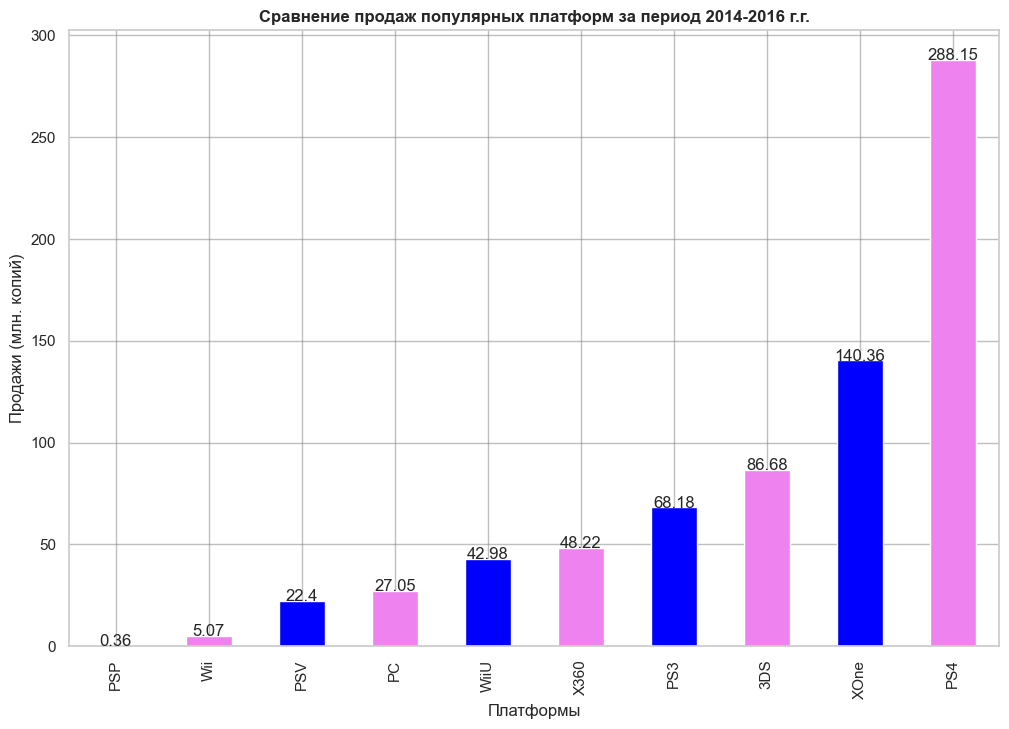

In [46]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (12, 8)

# создание списков из Serias
platform_lst = actual_df[actual_df["platform"] != "All"]["platform"].tolist()
all_lst = actual_df[actual_df["platform"] != "All"]["All"].tolist()


# объявление функции для подписи столбцов
def valuelabel(platform_lst, all_lst):
    for i in range(len(platform_lst)):
        plt.text(i, all_lst[i], round(all_lst[i], 2), ha="center")


# вывод диаграммы
a_df = actual_df[actual_df["platform"] != "All"].sort_values("All")
a_df[a_df["platform"] != "All"].plot(
    x="platform", y="All", kind="bar", color=["blue", "violet"], legend=False
)
platform_lst = a_df[a_df["platform"] != "All"]["platform"].tolist()
all_lst = a_df[a_df["platform"] != "All"]["All"].tolist()

# вывод функции
valuelabel(platform_lst, all_lst)

# установка заголовков графика
plt.title(
    "Сравнение продаж популярных платформ за период 2014-2016 г.г.", weight="bold"
)
plt.ylabel("Продажи (млн. копий)")
plt.xlabel("Платформы")
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

За указанный период по продажам лидируют платформы PS4, XOne и 3DS.

Так как данные за 2016 год могут быть не полными, для анализа возьмем данные за 2014 и 2015 г.г.\
Выясним, какие платформы увеличили продажи в 2015 году, а какие уменьшили

In [47]:
# функция категоризации
def get_category(total_sales_2015, total_sales_2014):
    value_diff = total_sales_2015 - total_sales_2014
    res = ""
    if value_diff > 0:
        res = "Продажи растут"
    else:
        res = "Продажи падают"
    return res


# создание нового столбца по условию
actual_df["sales_result"] = actual_df.apply(
    lambda col: get_category(col["total_sales_2015"], col["total_sales_2014"]), axis=1
)

# вывод по условию
print("Платформы с растущими продажами:")
print(*actual_df[actual_df["sales_result"] == "Продажи растут"]["platform"])
print("")
print("Платформы с падающими продажами:")
print(
    *actual_df.loc[
        (actual_df["sales_result"] == "Продажи падают")
        & (actual_df["platform"] != "All")
    ]["platform"]
)

Платформы с растущими продажами:
PS4 XOne

Платформы с падающими продажами:
3DS PC PS3 PSP PSV Wii WiiU X360


Выясним динамику роста продаж по платформам PS4 XOne

In [48]:
# вывод процента прироста
for i in ["PS4", "XOne"]:
    print(f"Продажи по платформе {i} выросли на", end=" ")
    print(
        round(
            *(
                (
                    actual_df[actual_df["platform"] == i]["total_sales_2015"]
                    - actual_df[actual_df["platform"] == i]["total_sales_2014"]
                )
                / actual_df[actual_df["platform"] == i]["total_sales_2015"]
                * 100
            ),
            2,
        ),
        end=" ",
    )
    print("%")

Продажи по платформе PS4 выросли на 15.9 %
Продажи по платформе XOne выросли на 10.09 %


***

**Вывод:**

1. За актуальный был принят период, охватывающий с 2014 по 2016 года включительно.
2. За указанный период регистрировались продажи по 10-ти платформам.
3. Топ-3 платформ по продажам в порядке убывания:
   - PS4,
   - XOne,
   - 3DS
4. Платформы с растущими продажами:
   - PS4
   - XOne
5. Платформы с падающими продажами:
   - 3DS
   - PC
   - PS3
   - PSP
   - PSV
   - Wii
   - WiiU
   - X360

### Диаграмма размаха по глобальным продажам игр

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.\
Возьмем данные только за актуальный период.

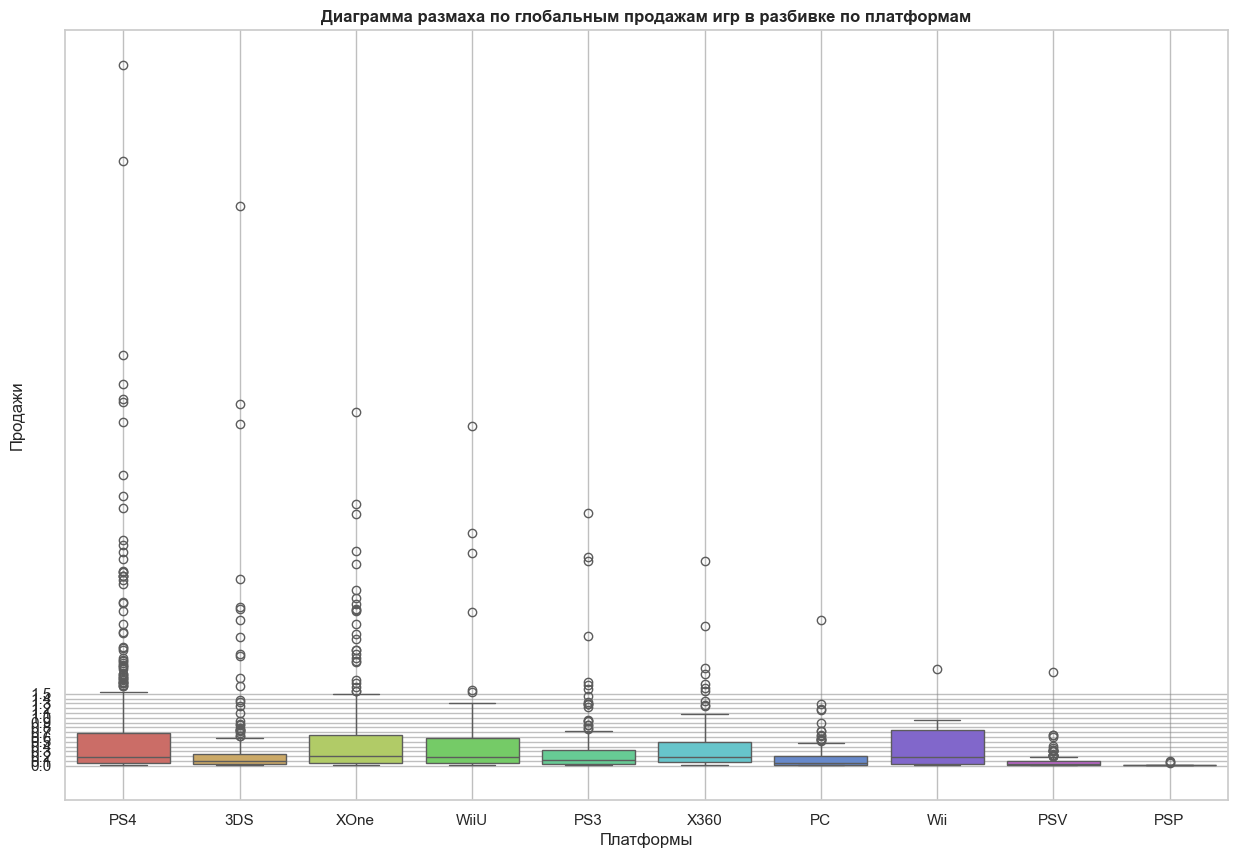

In [49]:
# запись нового датафрейма по условию
period_df = games_df.query("year_of_release >= 2014")

# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (15, 10)

# построение ящика с усами (boxplot)
sns.boxplot(
    data=period_df,
    x="platform",
    y="total_sales",
    palette="hls",
)

# установка заголовков графика
plt.title(
    "Диаграмма размаха по глобальным продажам игр в разбивке по платформам",
    weight="bold",
)
plt.ylabel("Продажи")
plt.xlabel("Платформы")
plt.yticks(np.arange(0, 1.6, 0.1))
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

Так как в данных много выбросов, и не представляется возможным рассмотреть график,\
построим боксплот, обрезав выбросы.

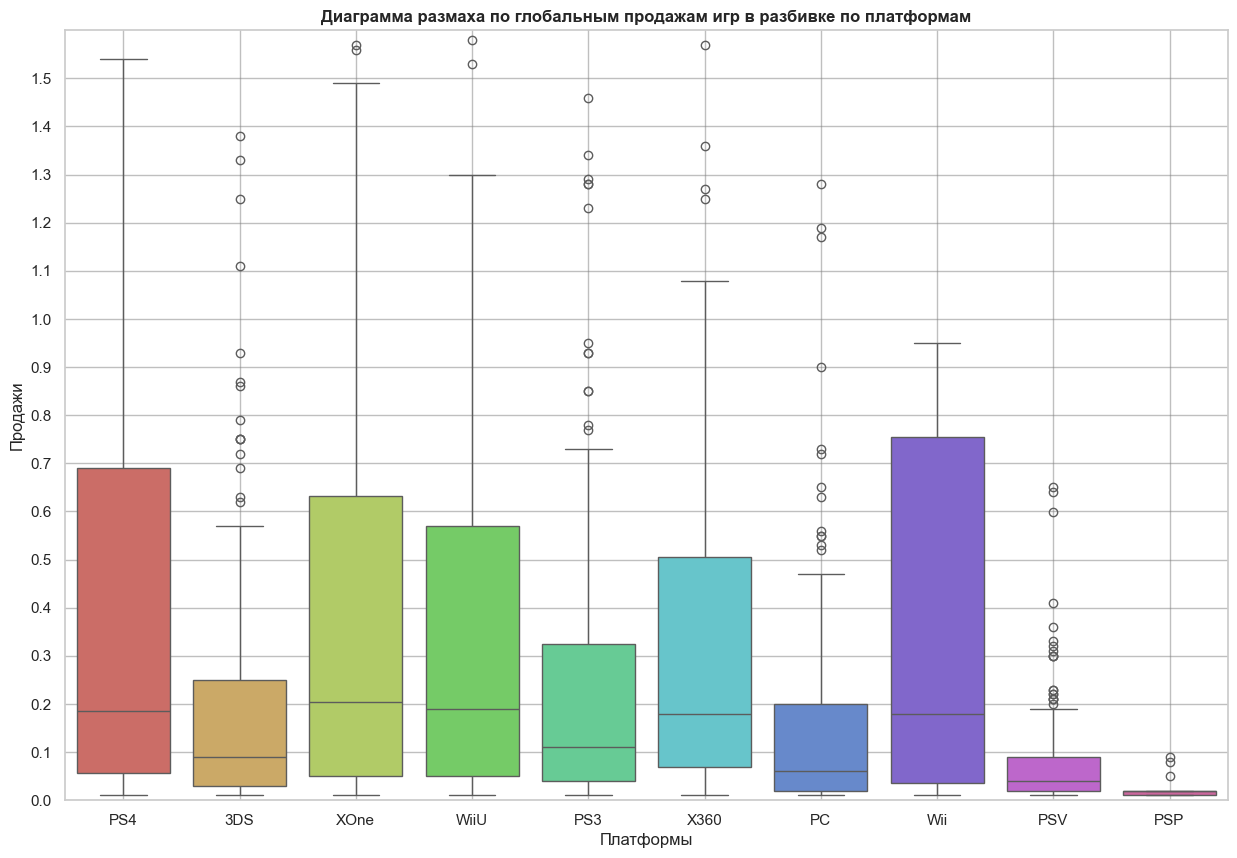

In [51]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (15, 10)
# построение ящика с усами (boxplot)
sns.boxplot(
    data=period_df,
    x="platform",
    y="total_sales",
    palette="hls",
)
# установка ограничения по оси Y
plt.ylim(0, 1.6)
# установка заголовков графика
plt.title(
    "Диаграмма размаха по глобальным продажам игр в разбивке по платформам",
    weight="bold",
)
plt.ylabel("Продажи")
plt.xlabel("Платформы")
plt.yticks(np.arange(0, 1.6, 0.1))
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

По межквартильному размаху видно, насколько велик разброс данных:
самые неоднородные значения у платформ Wii, PS4, XOne и WiiU

Также практически на всех диаграммах присутствует большое количество выбросов.

Сравним медианы платформ.

Медианы по 5-ти платформам: PS4, XOne, WiiU, X360, Wii
- находятся в одном небольшом диапазоне значений;
- выше медиан всех остальных платформ.

Выведем рейтинговый список медианных значений по платформам и медиану всей выборки

In [52]:
# вывод медианы по всей выборке
display(period_df["total_sales"].describe().round(2))
# вывод медиан по платформам
period_df.pivot_table(
    index="platform", values="total_sales", aggfunc="median"
).sort_values(by="total_sales", ascending=False)

count    1689.00
mean        0.43
std         1.06
min         0.01
25%         0.03
50%         0.10
75%         0.35
max        14.63
Name: total_sales, dtype: float64

,total_sales
platform,
XOne,0.205
WiiU,0.190
PS4,0.185
Wii,0.180
X360,0.180
PS3,0.110
3DS,0.090
PC,0.060
PSV,0.040


Медианы по 5-ти платформам PS4, XOne, WiiU, X360, Wii существенно выше, чем по остальным платформам,\
и существенно выше, чем медиана (0,1) по всей выборке.

***

**Вывод:**

Глобальные продажи игр по платформам:

- имеют большое количество выбросов;
- существенно отличаются по однородности значений данных;
- медианы по 5-ти платформам PS4, XOne, WiiU, X360, Wii существенно выше, чем по остальным платформам,\
  и существенно выше, чем медиана (0,1) по всей выборке.

### Оценка влияния на продажи отзывов пользователей и критиков

Оценим влияние на продажи оценок пользователей и критиков на примере платформы PS4.\
Построим диаграмму рассеяния.

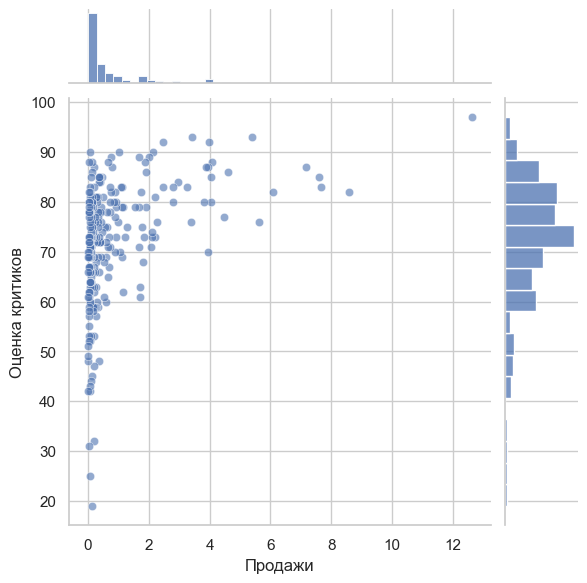

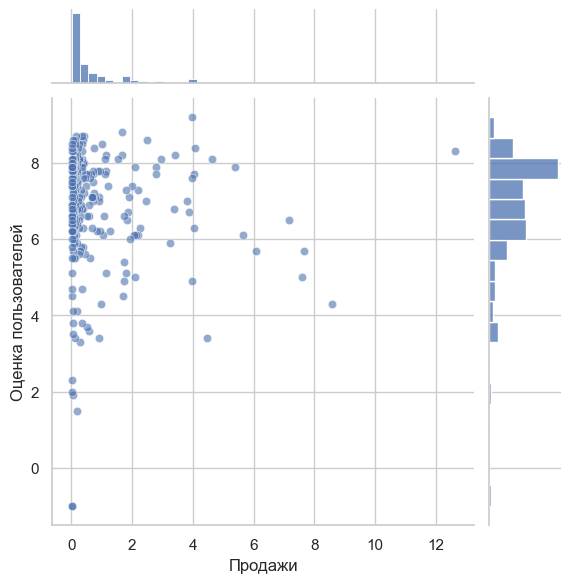

In [53]:
# вывод диаграмм рассеявания
target_column = "total_sales"
other_columns = {
    "critic_score": "Оценка критиков",
    "user_score": "Оценка пользователей",
}

for col in other_columns:
    joint = sns.jointplot(
        data=period_df.query(
            "platform == 'PS4' and not @games_df['critic_score'].isna()"
        ),
        y=col,
        x=target_column,
        kind="scatter",
        alpha=0.6,
    )
    joint.set_axis_labels("Продажи", other_columns.get(col))

На диаграммах рассеяния видно, что несмотря на оценки критиков или пользователей\
значительная масса продаж приходится на количество проданных копий до 4 млн. экземпляров.

Основная часть игр продается количеством копий не более 1 млн.

Также среди игр есть фавориты с продажами от 4 до 9 млн. копий -\
такие продажи характерны только для рейтинга по оценкам критиков более 85.\
Таких данных мало для подтверждения существования зависимости.

Также посчитаем корреляцию между столбцами таблицы `'critic_score'`, `'user_score'` и `'total_sales'`

In [54]:
# вывод коэффициента корреляции
period_df.query("platform == 'PS4'")[
    ["critic_score", "user_score", "total_sales"]
].corr()["total_sales"].round(2)

critic_score    0.40
user_score      0.02
total_sales     1.00
Name: total_sales, dtype: float64

Как следует из подсчетов, утверждать, что между продажами и оценками пользователей есть взаимосвязь, нельзя.

Значение коэффициента корреляции 0,4 говорит о присутствии некоторой взаимосвязи оценок критиков с продажами

Посмотрим на значение коэффициента корреляции для некоторых отрезков значений продаж.\
Для анализа не будем брать отрезок только с высокими значениями (свыше 6 млн. копий),\
так как таких значений слишком мало для наблюдений.

In [55]:
# объявление списка значений
total_sales_lst = [2, 3, 4, 5]
# вывод значений в цикле
for i in range(len(total_sales_lst)):
    print(
        f"Для продаж от {total_sales_lst[i]} млн. копий значение корреляции составляет:",
        end=" ",
    )
    print(
        period_df.query("platform == 'PS4' and total_sales > @total_sales_lst[@i]")[
            ["critic_score", "total_sales"]
        ]
        .corr()["total_sales"]
        .round(2)[0]
    )
    print("")

Для продаж от 2 млн. копий значение корреляции составляет: 0.37

Для продаж от 3 млн. копий значение корреляции составляет: 0.33

Для продаж от 4 млн. копий значение корреляции составляет: 0.49

0.56продаж от 5 млн. копий значение корреляции составляет: 



Таким образом, значение коэффициента тем выше, чем больше значение продаж.\
То есть высокие продажи больше коррелируют с оценками критиков, чем низкие.

---
<hr>

**Вывод:**

1. Нет данных для утверждения о существовании корреляции\
   между оценками пользователей и продажами.
2. Корреляция между оценками критиков и продажами прослеживается,\
   особенно на больших значениях продаж.

### Проверка выводов о корреляции между оценками и продажами

Проверим выводы об отсутствии корреляции между оценками пользователей\
и продажами на примере другой популярной платформы: **XOne**

In [56]:
# вывод коэффициента корреляции
print(
    period_df.query("platform == 'XOne'")["user_score"]
    .corr(period_df["total_sales"])
    .round(2)
)

0.09


Действительно, низкий коэффициент корреляции показывает отсутствие\
линейной зависимости между оценками пользователей и продажами.

Проверим выводы о существовании некоторой корреляции между оценками критиков и продажами.

Text(0.5, 0, 'Продажи')

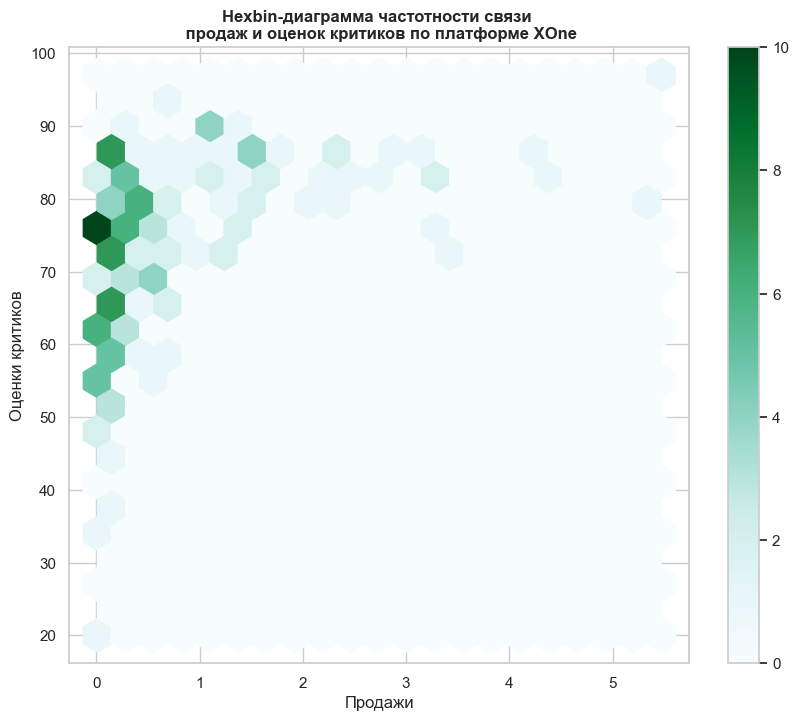

In [58]:
# вывод графика частотности
period_df[period_df["platform"] == "XOne"].plot(
    x="total_sales",
    y="critic_score",
    kind="hexbin",
    gridsize=20,
    figsize=(10, 8),
    sharex=False,
    grid=True,
)
plt.title(
    "Hexbin-диаграмма частотности связи \n продаж и оценок критиков по платформе XOne",
    weight="bold",
)
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")

***

На диаграмме присутствуют области повышенной частотности сочетаний значений оценок критиков и продаж.
Диаграмма показывает наличие некоторой взаимосвязи между оценками критиков и продажами.

**Вывод:**

1. Вывод об отсутствии прямой зависимости между оценками пользователей и продажами подтвердились.
2. Вывод о наличии некоторой взаимосвязи между оценками критиков и продажами подтвердились.

### Распределение игр по жанрам

Выведем список жанров датафрейма

In [59]:
# вывод уникальных значений столбца
print(*period_df["genre"].unique(), sep="\n")

Shooter
Action
Role-Playing
Sports
Fighting
Racing
Misc
Platform
Simulation
Adventure
Puzzle
Strategy


Сгруппируем данные по жанрам в разрезе общих продаж и выведем в отсортированном виде

In [60]:
# группировка датафрейма
period_df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Самый прибыльный жанр - это "Action".\
Проверим это, построив боксплоты по топ-4 жанров

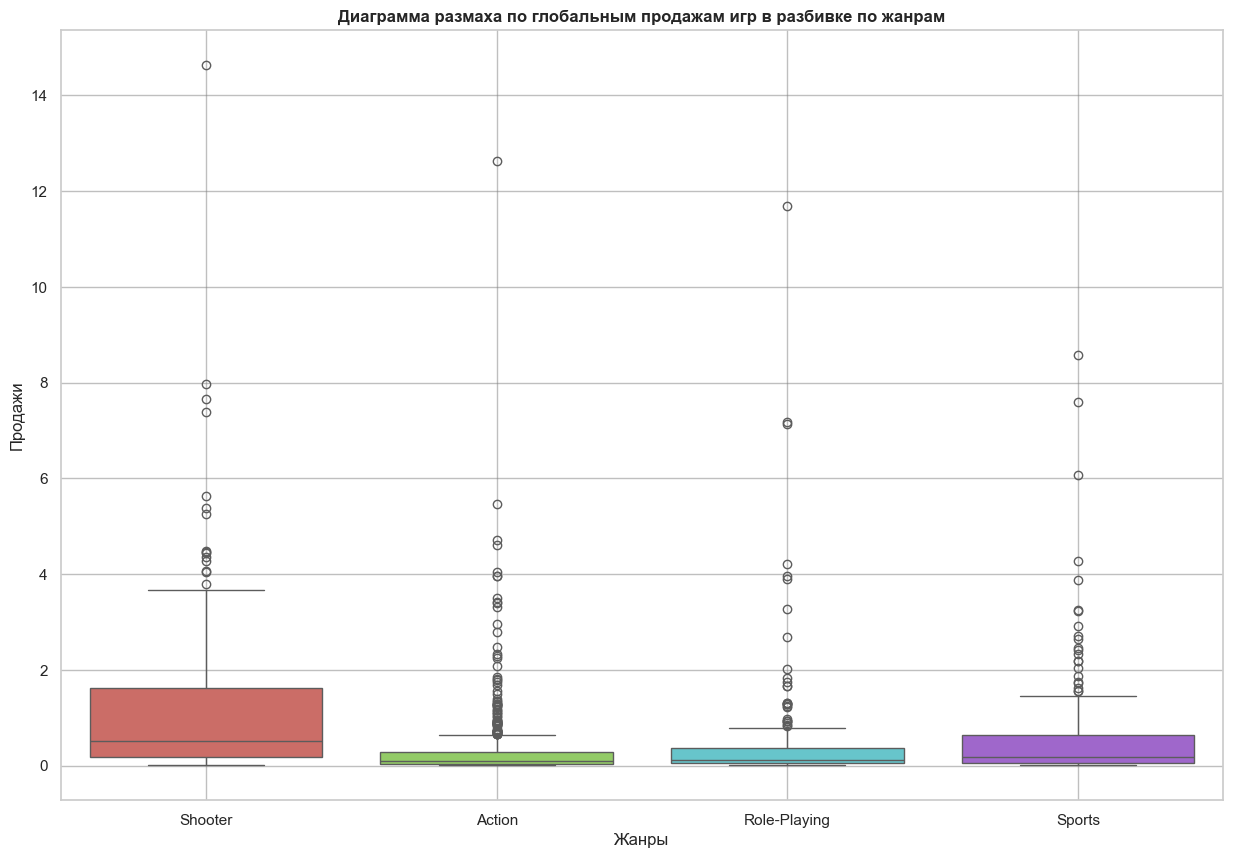

In [61]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (15, 10)
# построение ящика с усами (boxplot)
sns.boxplot(
    data=period_df.query("genre in ['Action', 'Shooter', 'Sports', 'Role-Playing']"),
    x="genre",
    y="total_sales",
    palette="hls",
)
# установка заголовков графика
plt.title(
    "Диаграмма размаха по глобальным продажам игр в разбивке по жанрам", weight="bold"
)
plt.ylabel("Продажи")
plt.xlabel("Жанры")
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

Чтобы лучше рассмотреть боксплот по предполагаемому фавориту среди жанров "Action"\
построим боксплот с установлением лимита по оси Y.

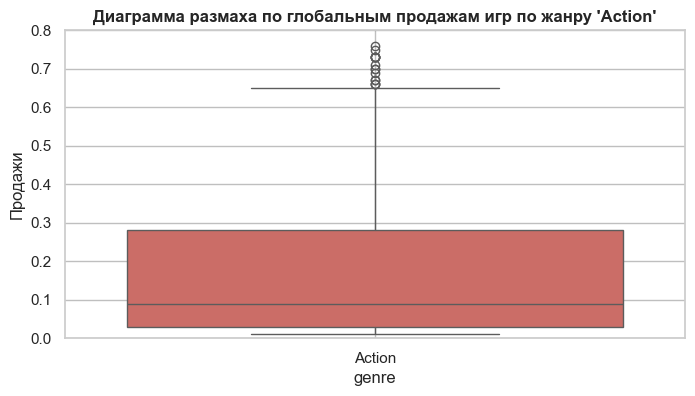

In [62]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (8, 4)
# построение ящика с усами (boxplot)
sns.boxplot(
    data=period_df[period_df["genre"] == "Action"],
    x="genre",
    y="total_sales",
    palette="hls",
)
# установка заголовков графика
plt.title(
    "Диаграмма размаха по глобальным продажам игр по жанру 'Action'", weight="bold"
)
# установка ограничения по оси Y
plt.ylim(0, 0.8)
plt.ylabel("Продажи")
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

Межквартильный размах для жанра "Action" - очень маленького размера,\
вне пределов максимума (Q3 + 1,5*IQR) лежит большое количество выбросов.\
Для жанра "Action" можно утверждать, что абсолютное большинство продаж игр лежит в очень маленьком диапазоне\
от 0,1 до 0,65 млн. копий.\
Высокие продажи по жанру обеспечены выбросами.

Вывод: самым прибыльным жанром является "Shooter".\
На втором месте - "Sports"

Для определения наименее прибыльных жанров построим боксплот по 4-м менее продаваемым.

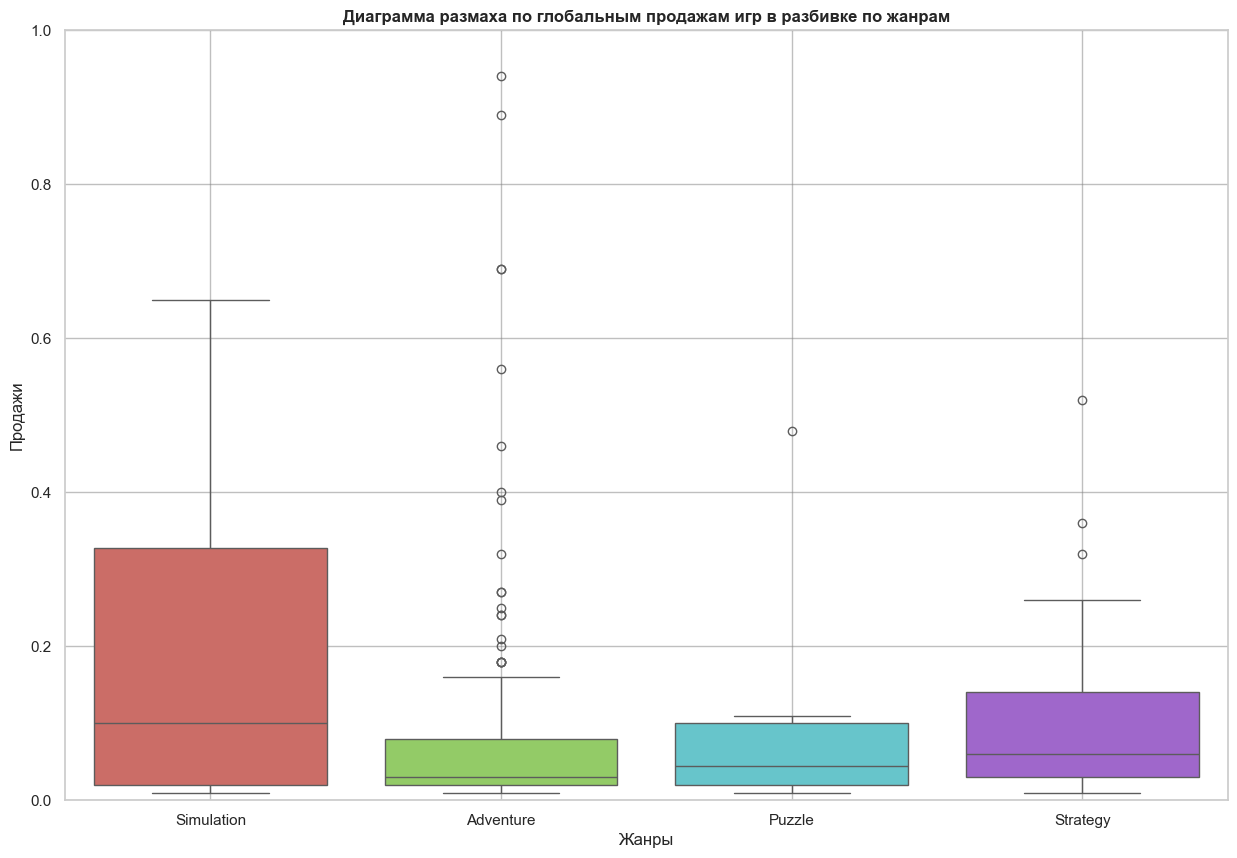

In [63]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (15, 10)
# построение ящика с усами (boxplot)
sns.boxplot(
    data=period_df.query("genre in ['Adventure', 'Simulation', 'Strategy', 'Puzzle']"),
    x="genre",
    y="total_sales",
    palette="hls",
)
# установка ограничения по оси Y
plt.ylim(0, 1)
# установка заголовков графика
plt.title(
    "Диаграмма размаха по глобальным продажам игр в разбивке по жанрам", weight="bold"
)
plt.ylabel("Продажи")
plt.xlabel("Жанры")
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

Несмотря на то, что на жанры "Puzzle" и "Strategy" приходятся наименьшие продажи,\
также малопродаваемым является жанр "Adventure".\
4-е снизу место по количеству продаж игр жанру "Adventure" обеспечивает большое количество выбросов.

***

**Вывод:**

1. Самым прибыльным жанром является "Shooter".\
   На втором месте - "Sports"
2. Самыми малопродаваемыми жанрами являются: "Adventure", "Puzzle" и "Strategy"

### Вывод по исследовательскому анализу данных

1. В датафрейме представлены игры с релизом с 1980 по 2016 год.
2. Рост числа выпуска игр начинается с 1993 года, с максимумом примерно в 2008-2009 г.г.\
   Далее наблюдается спад, и в период с 2012 по 2016 год наблюдается стабилизация количества релизов игр.
3. Были выведены платформы с наибольшими суммарными продажами за весь период наблюдений:
   PS2,	X360, PS3, Wii, DS,	PS,	PS4, GBA, PSP, 3DS.
4. Жизненный цикл платформы от выхода на рынок до исчезновения имеет характерные черты:
   - увеличение объема продаж
   - пик
   - снижение объема продаж
5. Срок жизни платформы составляет в среднем примерно 7 лет.
6. За актуальный был принят период, охватывающий с 2014 по 2016 года включительно.
7. За указанный период регистрировались продажи по 10-ти платформам.
8. Топ-3 платформ по продажам в порядке убывания:
   - PS4,
   - XOne,
   - 3DS
9. Платформы с растущими продажами:
   - PS4
   - XOne
10. Платформы с падающими продажами:
    - 3DS
    - PC
    - PS3
    - PSP
    - PSV
    - Wii
    - WiiU
    - X360
11. Глобальные продажи игр по платформам:
    - имеют большое количество выбросов;
    - существенно отличаются по однородности значений данных;
    - медианы по 5-ти платформам PS4, XOne, WiiU, X360, Wii существенно выше, чем по остальным платформам,\
      и существенно выше, чем медиана (0,1) по всей выборке.
12. Нет данных для утверждения о существовании корреляции\
    между оценками пользователей и продажами.
13. Установлена некоторая взаимозависимость продаж и оценок критиков.
14. Самым прибыльным жанром является "Shooter".\
    На втором месте - "Sports"
15. Самыми малопродаваемыми жанрами являются: "Adventure", "Puzzle" и "Strategy"

<a id='portrait'></a>
## Составление портрета пользователя каждого региона

### Самые популярные платформы (топ-5) для каждого региона

Определим самые популярные платформы в разрезе регионов продаж

In [64]:
# объявление списка регионов
regions = ["na_sales", "eu_sales", "jp_sales"]

# создание датафрейма с помощью pivot_table()
region_platform_df = period_df.pivot_table(
    index="platform",
    values=regions,
    aggfunc="sum",
    margins=True,
).reset_index()

# вывод датафрейма
region_platform_df

,platform,eu_sales,jp_sales,na_sales
0,3DS,16.12,44.24,22.64
1,PC,17.97,0.00,7.23
2,PS3,25.54,11.22,22.05
3,PS4,130.04,15.02,98.61
4,PSP,0.00,0.36,0.00
5,PSV,3.53,14.54,2.52
6,Wii,2.59,0.00,2.08
7,WiiU,13.15,7.31,19.36
8,X360,15.49,0.08,28.30
9,XOne,46.25,0.32,81.27


Вычислим доли продаж по каждой платформе

In [65]:
# создание новых столбцов по условию
for region in regions:
    region_platform_df[str(region + "_part")] = (
        region_platform_df[region]
        / region_platform_df.loc[region_platform_df.index[-1], region]
        * 100
    ).round(2)

Выведем топ-5 платформ по регионам продаж

In [66]:
# вывод датафреймов по условию
total_platform_df = pd.DataFrame(columns=["platform"])  # создание пустого датафрейма

# создание датафреймов по регионам продаж и объединение топ-5 в новый датафрейм
for region in regions:
    print(f'Топ-5 в "{region}":')
    region = (
        region_platform_df[region_platform_df["platform"] != "All"][
            ["platform", region, str(region + "_part")]
        ]
        .sort_values(by=region, ascending=False)
        .head()
    )
    total_platform_df = total_platform_df.merge(
        region, on="platform", how="outer"
    )  # создание датафрейма методом merge()
    print(region)
    print("")

Топ-5 в "na_sales":
  platform  na_sales  na_sales_part
3      PS4     98.61          34.71
9     XOne     81.27          28.61
8     X360     28.30           9.96
0      3DS     22.64           7.97
2      PS3     22.05           7.76

Топ-5 в "eu_sales":
  platform  eu_sales  eu_sales_part
3      PS4    130.04          48.04
9     XOne     46.25          17.09
2      PS3     25.54           9.44
1       PC     17.97           6.64
0      3DS     16.12           5.96

Топ-5 в "jp_sales":
  platform  jp_sales  jp_sales_part
0      3DS     44.24          47.52
3      PS4     15.02          16.13
5      PSV     14.54          15.62
2      PS3     11.22          12.05
7     WiiU      7.31           7.85



Сравним доли продаж популярных платформ по регионам на столбчатой диаграмме

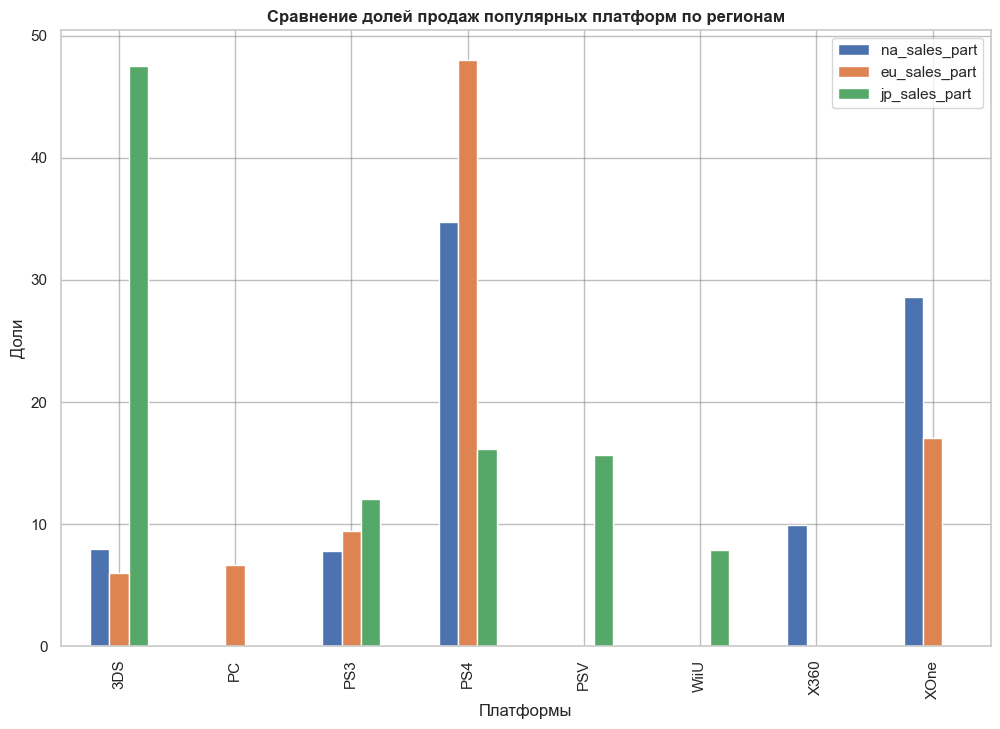

In [67]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (12, 8)
# вывод диаграммы
total_platform_df.plot(
    x="platform", y=["na_sales_part", "eu_sales_part", "jp_sales_part"], kind="bar"
)
# установка заголовков графика
plt.title("Сравнение долей продаж популярных платформ по регионам", weight="bold")
plt.ylabel("Доли")
plt.xlabel("Платформы")
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

В Европе и Японии есть безусловные лидеры по продажам среди платформ (PS4 и 3DS соответственно) с долей продаж около 48%.\
Следующие по популярности платформы (XOne и PS4 соответственно) имеют долю 16-17%

В Америке нет такого сильного разрыва с лидером: PS4 ~34.7% и XOne ~28.6%

Платформа PS4 занимает 1 место по популярности в Европе и Америке, 2 место - в Японии.

В Европе и Америке список популярных платформ почти идентичен: 4 из топ-5 общие - PS4, XOne, 3DS и PS3,\
причем первое и второе места у одних и тех же платформ - PS4, XOne.

Япония более своеобразна: первое место у платформы 3DS, а две платформы представлены только в рейтинге Японии - PSV и WiiU.

### Самые популярные жанры (топ-5)

Определим самые популярные жанры в разрезе регионов продаж

In [68]:
# создание фатафрейма с помощью pivot_table()
region_genre_df = period_df.pivot_table(
    index="genre",
    values=regions,
    aggfunc="sum",
    margins=True,
).reset_index()

# вывод датафрейма
region_genre_df

,genre,eu_sales,jp_sales,na_sales
0,Action,74.68,29.58,72.53
1,Adventure,6.49,3.60,5.64
2,Fighting,6.69,6.37,12.43
3,Misc,12.86,5.61,15.05
4,Platform,6.80,2.69,6.79
5,Puzzle,0.52,0.93,0.65
6,Racing,14.13,1.76,8.74
7,Role-Playing,28.17,31.16,33.47
8,Shooter,65.52,4.87,79.02
9,Simulation,7.30,2.31,2.63


Вычислим доли продаж по каждому жанру

In [69]:
# создание новых столбцов по условию
for region in regions:
    region_genre_df[str(region + "_part")] = (
        region_genre_df[region]
        / region_genre_df.loc[region_genre_df.index[-1], region]
        * 100
    ).round(2)

Выведем топ-5 платформ по регионам продаж

In [70]:
# вывод датафреймов по условию
total_genre_df = pd.DataFrame(columns=["genre"])  # создание пустого фатафрейма

# создание датафреймов по регионам продаж и объединение топ-5 в новый датафрейм
for region in regions:
    print(f'Топ-5 в "{region}":')
    region = (
        region_genre_df[region_genre_df["genre"] != "All"][
            ["genre", region, str(region + "_part")]
        ]
        .sort_values(by=region, ascending=False)
        .head()
    )
    total_genre_df = total_genre_df.merge(
        region, on="genre", how="outer"
    )  # создание датафрейма методом merge()
    print(region)
    print("")

Топ-5 в "na_sales":
           genre  na_sales  na_sales_part
8        Shooter     79.02          27.82
0         Action     72.53          25.53
10        Sports     46.13          16.24
7   Role-Playing     33.47          11.78
3           Misc     15.05           5.30

Топ-5 в "eu_sales":
           genre  eu_sales  eu_sales_part
0         Action     74.68          27.59
8        Shooter     65.52          24.21
10        Sports     45.73          16.89
7   Role-Playing     28.17          10.41
6         Racing     14.13           5.22

Топ-5 в "jp_sales":
          genre  jp_sales  jp_sales_part
7  Role-Playing     31.16          33.47
0        Action     29.58          31.78
2      Fighting      6.37           6.84
3          Misc      5.61           6.03
8       Shooter      4.87           5.23



Сравним доли продаж популярных жанров по регионам на столбчатой диаграмме

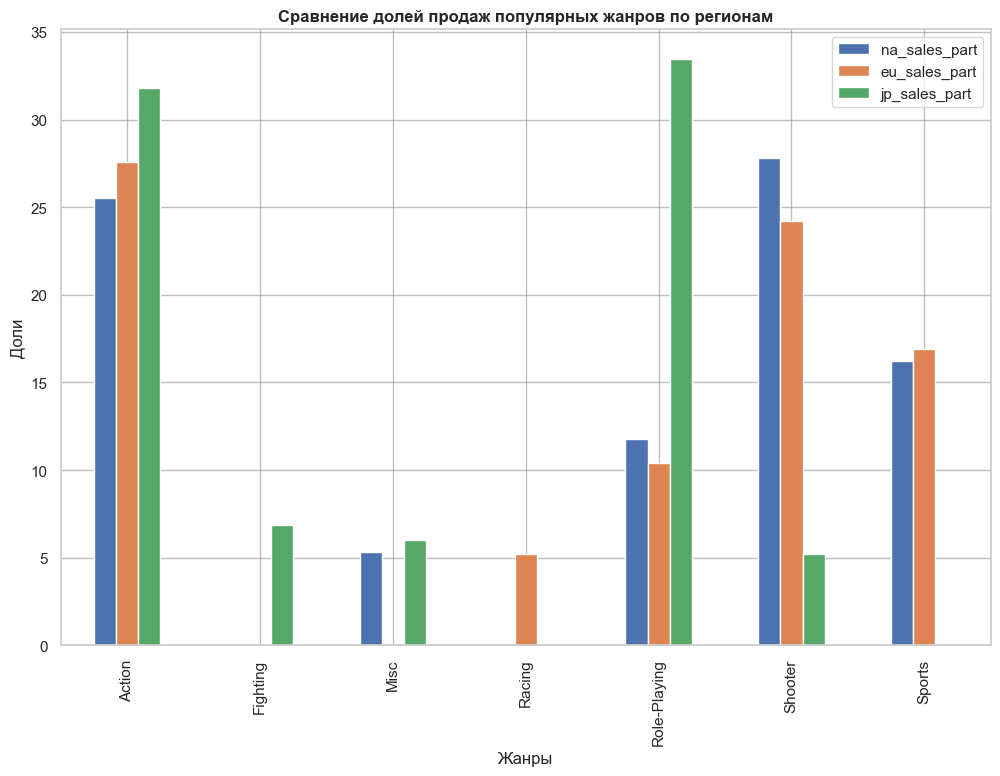

In [71]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (12, 8)
# вывод диаграммы
total_genre_df.plot(
    x="genre", y=["na_sales_part", "eu_sales_part", "jp_sales_part"], kind="bar"
)
# установка заголовков графика
plt.title("Сравнение долей продаж популярных жанров по регионам", weight="bold")
plt.ylabel("Доли")
plt.xlabel("Жанры")
plt.grid(color="grey", axis="both", alpha=0.5)

plt.show()

Рейтинг популярных жанров, их доли в продажах в Европе и Америке почти идентичны.\
Самые популярные жанры в этих регионах: Shooter, Action, Sports и Role-Playing.

Рейтинг жанров в Японии возглавляют Role-Playing (33.47%) и Action (31.78%), а Shooter только на пятом месте (5.23%).\
Причем разрыв между лидерами и остальными жанрами значительный.

### Влияние рейтинга на продажи в отдельном регионе

Соберем данные по продажам в разрезе рейтингов по регионам

In [72]:
# создание фатафрейма с помощью pivot_table()
region_rating_df = (
    period_df[period_df["rating"] != "unknown"]
    .pivot_table(
        index="rating",
        values=regions,
        aggfunc="sum",
        margins=True,
    )
    .reset_index()
)

# вывод датафрейма
region_rating_df

,rating,eu_sales,jp_sales,na_sales
0,E,58.06,8.94,50.74
1,E10+,26.16,4.46,33.23
2,M,93.44,8.01,96.42
3,T,34.07,14.78,38.95
4,All,211.73,36.19,219.34


Вычислим доли продаж по каждому рейтингу

In [73]:
# создание новых столбцов по условию
for region in regions:
    region_rating_df[str(region + "_part")] = (
        region_rating_df[region]
        / region_rating_df.loc[region_rating_df.index[-1], region]
        * 100
    ).round(2)

Выведем топ рейтингов по продажам по регионам продаж

In [74]:
# вывод датафреймов по условию
total_rating_df = pd.DataFrame(columns=["rating"])  # создание пустого фатафрейма

# создание датафреймов по регионам продаж и объединение топ-5 в новый датафрейм
for region in regions:
    print(f'Топ в "{region}":')
    region = (
        region_rating_df[region_rating_df["rating"] != "All"][
            ["rating", region, str(region + "_part")]
        ]
        .sort_values(by=region, ascending=False)
        .head()
    )
    total_rating_df = total_rating_df.merge(
        region, on="rating", how="outer"
    )  # создание датафрейма методом merge()
    print(region)
    print("")

Топ в "na_sales":
  rating  na_sales  na_sales_part
2      M     96.42          43.96
0      E     50.74          23.13
3      T     38.95          17.76
1   E10+     33.23          15.15

Топ в "eu_sales":
  rating  eu_sales  eu_sales_part
2      M     93.44          44.13
0      E     58.06          27.42
3      T     34.07          16.09
1   E10+     26.16          12.36

Топ в "jp_sales":
  rating  jp_sales  jp_sales_part
3      T     14.78          40.84
0      E      8.94          24.70
2      M      8.01          22.13
1   E10+      4.46          12.32



Сравним доли продаж игр по рейтингам ESRB по регионам на столбчатой диаграмме

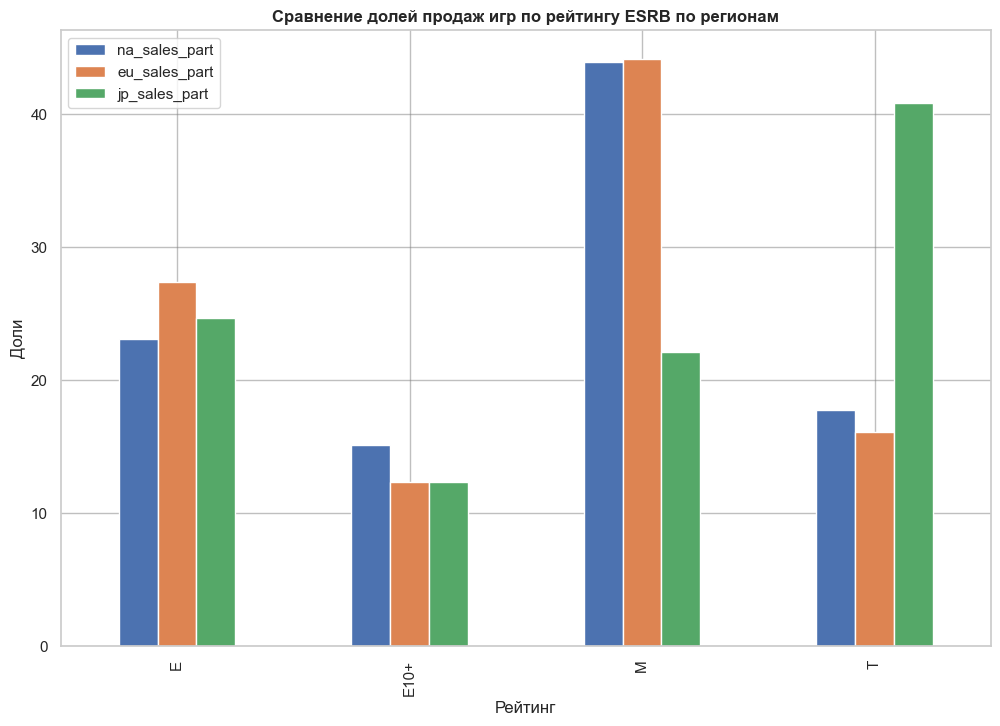

In [75]:
# установка параметров графика: размер фигуры
plt.rcParams["figure.figsize"] = (12, 8)
# вывод диаграммы
total_rating_df.plot(
    x="rating", y=["na_sales_part", "eu_sales_part", "jp_sales_part"], kind="bar"
)
# установка заголовка графика
plt.title("Сравнение долей продаж игр по рейтингу ESRB по регионам", weight="bold")
# добавление подписи для оси Y
plt.ylabel("Доли")
# добавление подписи для оси X
plt.xlabel("Рейтинг")
# включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
plt.grid(color="grey", axis="both", alpha=0.5)
# показ графика
plt.show()

В Америке и Европе одинаковое распределение продаж игр по рейтингам:\
с существенным отрывом лидирует рейтинг M - "Для взрослых" (~44%),
на втором месте E - "Для всех".

В Японии больше всего покупают игры с рейтингом T - "Для подростков" (40.84%),\
а рейтинг M - "Для взрослых" (22.13%) только на третьем месте.

### Портрет пользователя каждого региона

**Вывод:**

На основании сделанного исследования по региона продаж можно составить портрет пользователя каждого региона:


|Регион продажи|Платформа|Жанр|Рейтинг|
|:-|:-|:-|:-|
|Америка|PS4 и XOne|"Shoter", "Action" и "Sports"|M и E|
|Европа|PS4 и XOne|"Shoter", "Action" и "Sports"|M и E|
|Япония|3DS и PS4|"Role_Playing" и "Action"|T и E|

<a id='conclusion'></a>
## Вывод

**ВХОДНЫЕ ДАННЫЕ:**

В результате изучения общей информации о датафрейме обнаружено:

1. Некорректное наименование столбцов:
   - во всех столбцах - сочетание прописных и строчных букв, стиль написания, отличный от "lower_case_with_underscores"
2. Большое количество пропущенных значений в 3-х столбцах:
   - `'Critic_Score'`
   - `'User_Score'`
   - `'Rating'`
3. Также пропущены значения в 3-х столбцах:
   - `'Name'`
   - `'Year_of_Release'`
   - `'Genre'`
4. Неправильный тип данных в 2-х столбцах:
   - `'Year_of_Release'`
   - `'User_Score'`
5. Явные дубликаты в датафрейме отсутствуют.

**НА ЭТАПЕ ПРЕДОБРАБОТКИ:**

1. Названия всех столбцов были приведены к стилю "lower_case_with_underscores"
2. Были найдены неявные дубликаты. Удалено 2 строки.
3. Удалено 270 строк с пропусками в столбцах:
   - `'year_of_release'`
   - `'name'`
   - `'genre'`
4. Была обнаружена взаимосвязь пропусков в столбцах
   - `'critic_score'`
   - `'user_score'`
   - `'rating'`
5. Одна из вероятных причин появления пропусков в столбцах:
   - `'critic_score'`
   - `'user_score'`
   - `'rating'`\
   это ошибка при сборке информации в таблицу.
6. Пропуски не были заполнены в столбцах
   - `'critic_score'`
   - `'user_score'`
7. Пропуски были заполнены значением "*unrnown*" в столбце
   - `'rating'`
8. Значение "*tbd*" было преобразовано в значение -1 в столбце `'user_score'`
9. Были преобразованы типы данных:
   - На целочисленный в столбцах
     -  `'year_of_release'`
     -  `'critic_score'`
   - На числовой тип **float** в столбце
     - `'user_score'`
10. Был создан новый столбец `'total_sales'` с суммарными продажами по всем регионам.
11. Были выведены количественные результаты предобработки.

**АНАЛИЗ:**

1. В датафрейме представлены игры с релизом с 1980 по 2016 год.
2. Рост числа выпуска игр начинается с 1993 года,\
   с максимумом примерно в 2008-2009 г.г. - 1427, 1426 игр соответственно.\
   Далее наблюдается спад, и в период с 2012 по 2016 год наблюдается\
   стабилизация количества релизов игр, примерно 500-600 игр в год.
3. Были выведены платформы с наибольшими суммарными продажами за весь период наблюдений:\
   PS2,	X360, PS3, Wii, DS,	PS,	PS4, GBA, PSP, 3DS.
4. Срок жизни платформы составляет в среднем примерно 7 лет.
5. За актуальный был принят период, охватывающий с 2014 по 2016 года включительно.
6. За указанный период регистрировались продажи по 10-ти платформам.
7. Топ-3 платформ по продажам в порядке убывания:
   - PS4 с продажами 288,15 млн. копий,
   - XOne с продажами 140,36 млн. копий,
   - 3DS с продажами 86,68 млн. копий
8. Платформы с растущими продажами:
   - PS4 на 15.9 % в 2015 году по сравнению с 2014 годом;
   - XOne на 10.09 % в 2015 году по сравнению с 2014 годом.
9. Платформы с падающими продажами:
    - 3DS
    - PC
    - PS3
    - PSP
    - PSV
    - Wii
    - WiiU
    - X360
10. Нет данных для утверждения о существовании корреляции\
    между оценками пользователей и продажами.
11. Установлена некоторая умеренная взаимосвязь между продажами и оценками критиков.
    Значение коэффициента корреляции тем выше, чем больше значение продаж.\
    То есть высокие продажи больше коррелируют с оценками критиков, чем низкие.
12. Самым прибыльным жанром является "Shooter".\
    На втором месте - "Sports", затем "Action"
13. Самыми малопродаваемыми жанрами являются: "Adventure", "Puzzle" и "Strategy"

**ВЫВОД:**

***Топ-5 платформ:***
В Европе и Японии есть безусловные лидеры по продажам среди платформ (PS4 и 3DS соответственно) с долей продаж около 48%.\
Платформа PS4 занимает 1 место по популярности в Европе и Америке, 2 место - в Японии.
В Европе и Америке список популярных платформ почти идентичен: 4 из топ-5 общие - PS4, XOne, 3DS и PS3,\
Япония более своеобразна: первое место у платформы 3DS, а две платформы представлены только в рейтинге Японии - PSV и WiiU.

***Топ-5 жанров:***
Рейтинг популярных жанров, их доли в продажах в Европе и Америке почти идентичны.\
Самые популярные жанры в этих регионах: Shooter, Action, Sports и Role-Playing.\
Рейтинг жанров в Японии возглавляют Role-Playing (33.47%) и Action (31.78%), а Shooter только на пятом месте (5.23%).

***Рейтинг по регионам:***
В Америке и Европе одинаковое распределение продаж игр по рейтингам:
с существенным отрывом лидирует рейтинг M - "Для взрослых" (~44%), на втором месте E - "Для всех".
В Японии больше всего покупают игры с рейтингом T - "Для подростков" (40.84%),
а рейтинг M - "Для взрослых" (22.13%) только на третьем месте.

На основании сделанного исследования по регионам продаж составлен портрет пользователя каждого региона:

|Регион продажи|Платформа|Жанр|Рейтинг|
|:-|:-|:-|:-|
|Америка|PS4 и XOne|"Shoter", "Action" и "Sports"|M и E|
|Европа|PS4 и XOne|"Shoter", "Action" и "Sports"|M и E|
|Япония|3DS и PS4|"Role_Playing" и "Action"|T и E|

**РЕКОМЕНДАЦИИ:**

При планировании рекламных компаний игр на 2017 год интернет магазина "Стримчик"\
необходимо руководствоваться портретом пользователя каждого региона продаж, а именно:

- для регионов продаж Америка и Европа - платформа PS4, жанры "Shoter", "Action" и "Sports", рейтинги M и E
- для региона продаж Япония - платформа 3DS, жанры "Role_Playing" и "Action", рейтинги T и E

Также стоит обратить внимание на оценки критиков для планирования рекламных компаний.

Следует рассмотреть влияние оценок критиков и пользователей на продажи в разрезе регионов продаж.\
Особенно внимательно следует отнестить к региону продаж Япония,\
так как этот регион отличается своеобразием по предпочитаемым рейтингам и жанрам.